## 1.Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

## Reading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\DATA ANALYSIS\Ultimate Projects\Netflix Dataset\PYTHON\Netflix Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


## 2.Data Cleaning

## Finding the duplicate row and delete those rows

In [3]:
#Duplicate rows
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [4]:
#Deleting duplicate rows
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


## Is there any null value in any column? show with the hitmap

In [5]:
#Showing the dataset that data is consists of null values or not
df.isnull()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7784,False,False,False,False,False,False,False,False,False,False,False
7785,False,False,False,False,False,False,False,False,False,False,False
7786,False,False,False,True,False,True,False,False,False,False,False
7787,False,False,False,True,False,False,False,False,False,False,False


In [6]:
#showing the number of null values per column
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<AxesSubplot:>

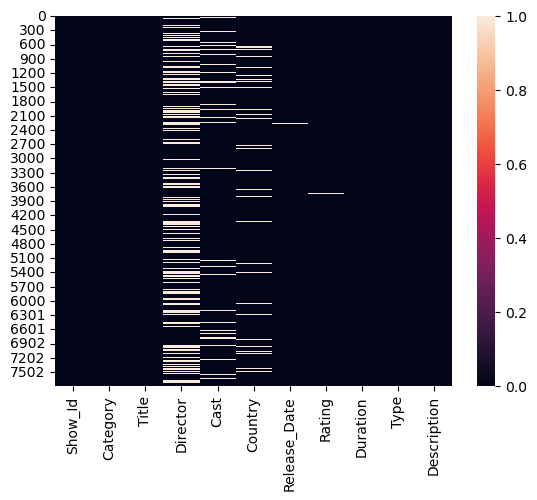

In [7]:
#Using heatmap to show the null values
sns.heatmap(data=df.isnull())

In [8]:
df['Date']=pd.to_datetime(df['Release_Date'],dayfirst=True)
df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31


## 3.Creating new csv file which will consists the modified cleaned table/data

In [9]:
output_folder = r'C:\Users\User\Desktop\DATA ANALYSIS\Ultimate Projects\Netflix Dataset\SQL'  # Change as needed

# Create folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Save cleaned CSV
output_file = os.path.join(output_folder, 'cleaned_Netflix Dataset.csv')
df.to_csv(output_file, index=False)

print(f"Cleaned data saved to: {output_file}")

Cleaned data saved to: C:\Users\User\Desktop\DATA ANALYSIS\Ultimate Projects\Netflix Dataset\SQL\cleaned_Netflix Dataset.csv


## 4.Exploratory Analysis

## For 'House of Cards' What is the show id? and who is the Director of the show?

In [10]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01


In [11]:
#showing the row which has title 'House of Cards'
df[df['Title']=='House of Cards']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...,2018-11-02


In [12]:
#Showing the title,show_id and director of the title 'House of Cards'
df.loc[df['Title'].isin(['House of Cards']), ['Show_Id', 'Title', 'Director']]


,Show_Id,Title,Director
2832,s2833,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J..."


## In which year the highest number of Tv shows & Movies were released? show bar graph

In [13]:
#Showing the number of tv shows & movies
df['Date']=pd.to_datetime(df['Release_Date'],dayfirst=True)
year_num=df.groupby(df['Date'].dt.year)['Category'].count().reset_index().rename(columns={'Category':'Number of Tv shows & Movies','Release_Date':'Date'})
year_num

,Date,Number of Tv shows & Movies
0,2008.0,2
1,2009.0,2
2,2010.0,1
3,2011.0,13
4,2012.0,3
5,2013.0,11
6,2014.0,25
7,2015.0,88
8,2016.0,443
9,2017.0,1225


Text(0.5, 1.0, 'Number of Tv shows & Movies per year')

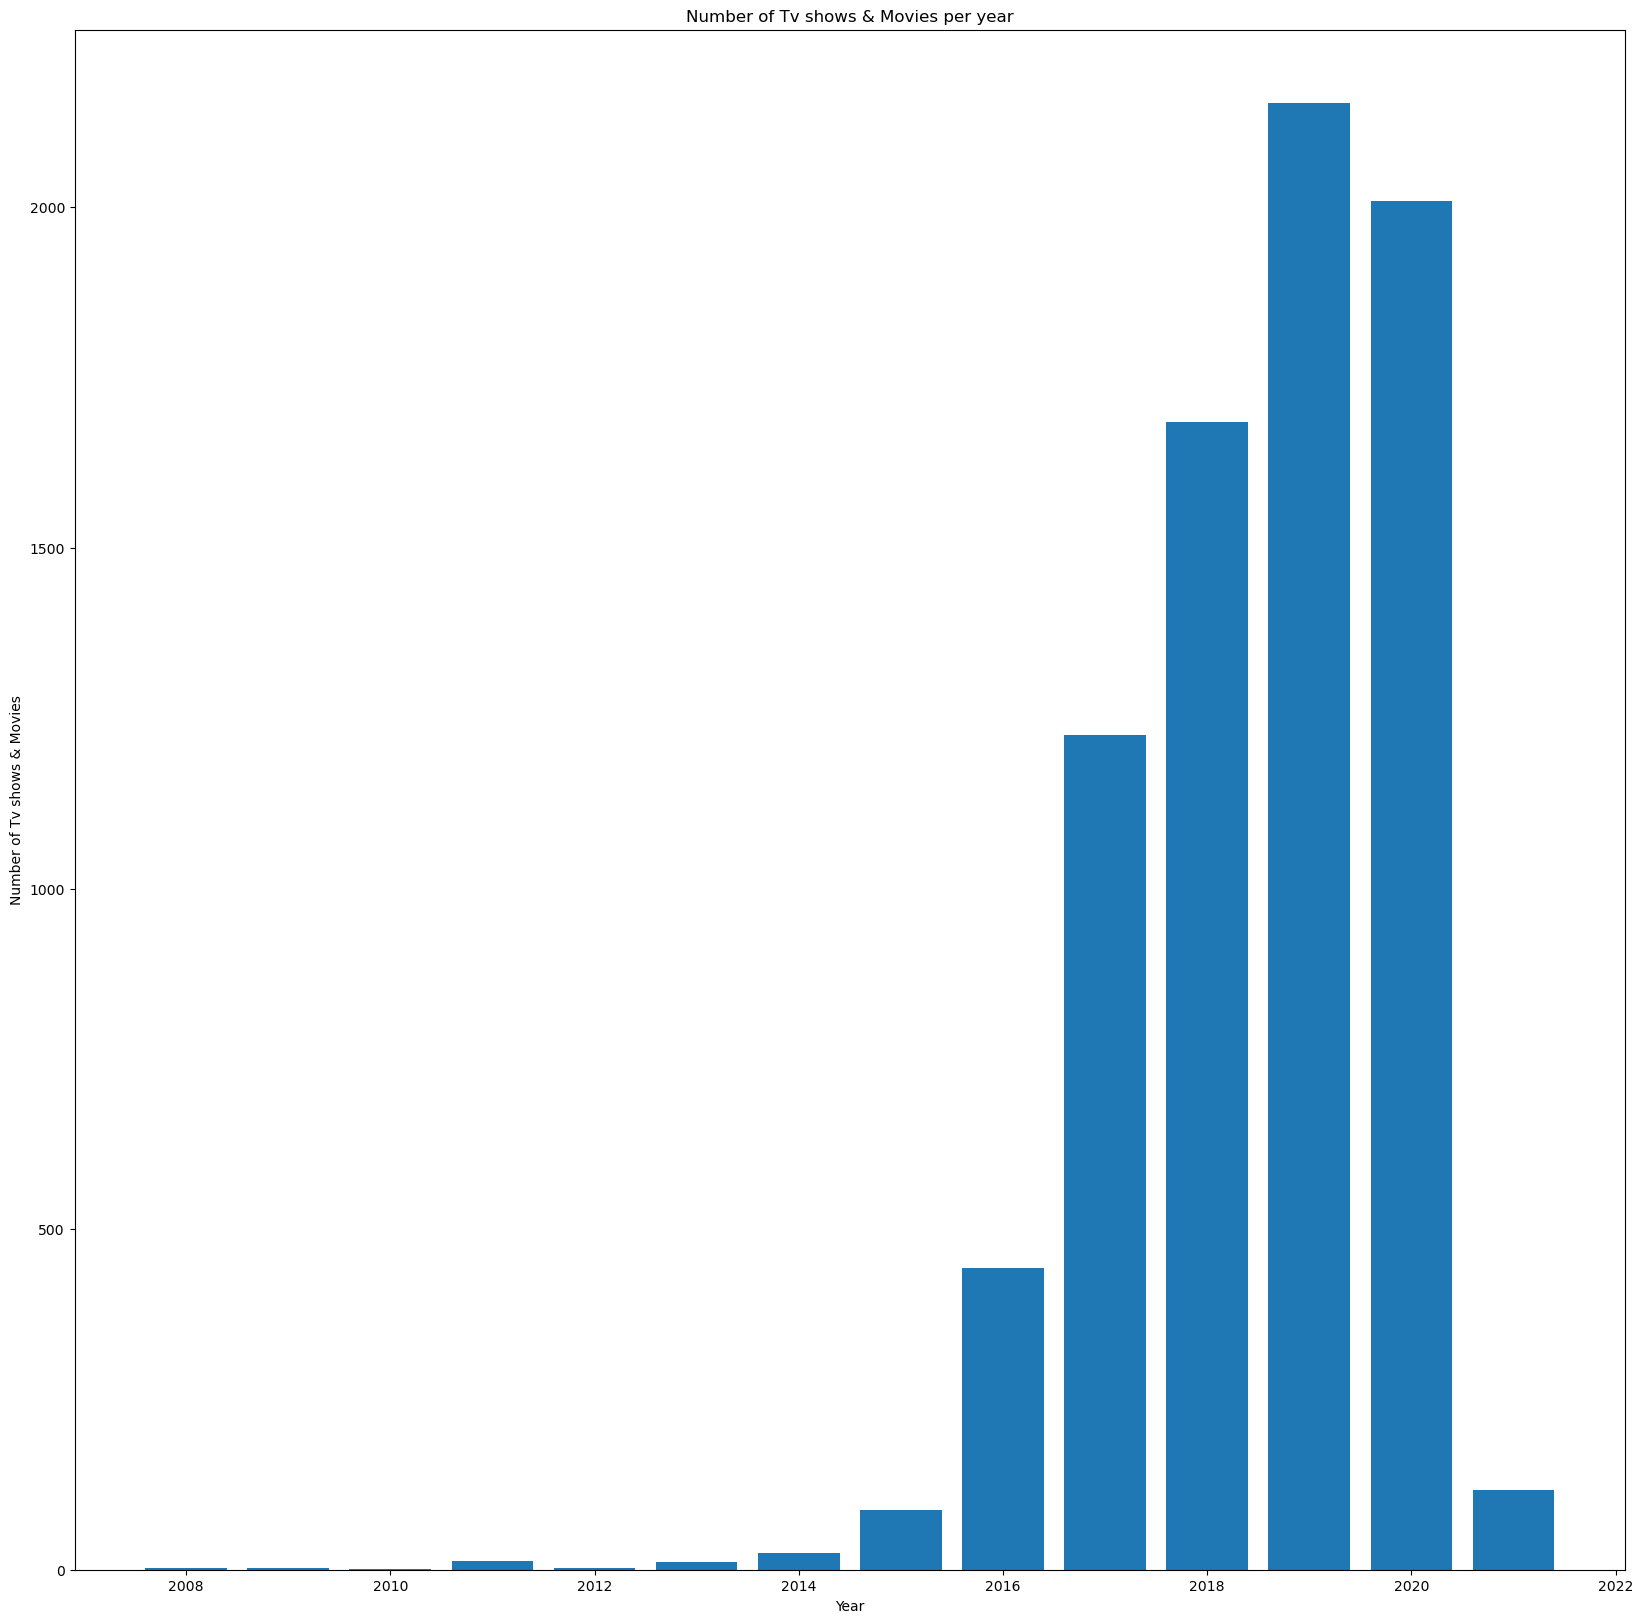

In [14]:
#showing the bar graph to decide which year has highest number of tv shows & movies
plt.figure(figsize=(20,20))
plt.bar(year_num['Date'],year_num['Number of Tv shows & Movies'])
plt.xlabel('Year')
plt.ylabel('Number of Tv shows & Movies')
plt.title('Number of Tv shows & Movies per year')

In [15]:
#showing the row which has the highest number of tv shows & movies
year_num[year_num['Number of Tv shows & Movies'] == year_num['Number of Tv shows & Movies'].max()]

,Date,Number of Tv shows & Movies
11,2019.0,2153


## Show how many Tv shows & Movies in the dataset


In [16]:
tm=df.groupby('Category')['Category'].count().reset_index(name='Count')
tm

,Category,Count
0,Movie,5377
1,TV Show,2410


C:\Users\User\Desktop\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of count per category')

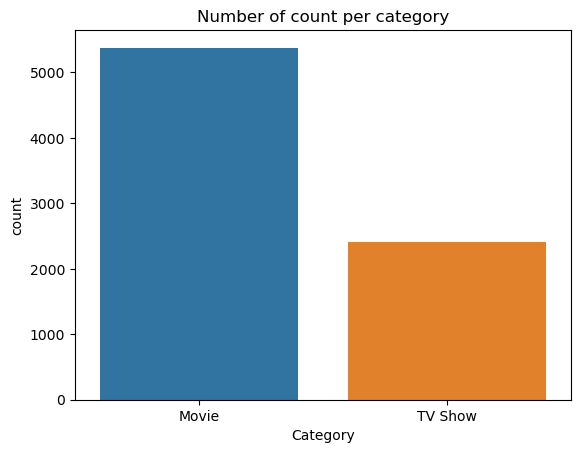

In [17]:
sns.barplot(tm['Category'],tm['Count'])
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Number of count per category')

## Show all the movies that were released in year 2020

In [18]:
df[(df['Category']=='Movie') & (df['Date'].dt.year==2020)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020-06-01
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",2020-09-08
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,"July 1, 2020",TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
7762,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,"May 19, 2020",TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...,2020-05-19
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25


## Show only the titles of the tv shows that were released in india only

In [19]:
df.loc[(df['Country']=='India') & (df['Category']=="TV Show"),['Country','Category','Title']]

,Country,Category,Title
86,India,TV Show,21 Sarfarosh: Saragarhi 1897
132,India,TV Show,7 (Seven)
340,India,TV Show,Agent Raghav
364,India,TV Show,Akbar Birbal
533,India,TV Show,Anjaan: Rural Myths
...,...,...,...
6249,India,TV Show,The Creative Indians
6400,India,TV Show,The Golden Years with Javed Akhtar
6469,India,TV Show,The House That Made Me
7294,India,TV Show,Typewriter


## Show the top 10 directors who gave the most number of tv shows & movies to netflix

In [20]:
df['Director'].value_counts().reset_index(name='Count').rename(columns={'index':'Director'}).sort_values(by='Count',ascending=False).head(10)

,Director,Count
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Jay Chapman,12
5,Youssef Chahine,12
6,Martin Scorsese,12
7,Steven Spielberg,10
8,David Dhawan,9
13,Shannon Hartman,8


## Show all the records where "Category is Movie and Type is Comedies" or "Country is United Kingdom"

In [21]:
df[((df['Category']=='Movie') & (df['Type']=='Comedies')) | (df['Country']=='United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019-11-01
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,"August 1, 2017",TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017-08-01
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020-03-18
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017-12-31


## In how many movies Tom Cruise was cast

In [22]:
df[(df['Category']=='Movie') & (df['Cast'].str.contains('Tom Cruise'))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01


## What are the different ratings in the dataset?

In [23]:
df['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

## How many movies got the 'TV-14' ratings in canada

In [24]:
df[(df['Category']=='Movie') & (df['Country']=='Canada') & (df['Rating']=='TV-14')]['Rating'].count()

11

## How many TV Show got the 'R' rating after the year 2018

In [25]:
df[(df['Category']=='TV Show') & (df['Date'].dt.year>2018) & (df['Rating']=='R')]['Date'].count()

1

## What is the maximum duration of a TV Show/movie?

In [26]:
df[['Minutes','Units']]=df['Duration'].str.split(' ',expand=True)
df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Minutes,Units
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,80,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,123,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,99,min
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02,111,min
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25,44,min
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31,1,Season


In [27]:
df[df['Minutes']==df['Minutes'].max()]['Minutes'].max()

'99'

## Which individual country has the highest number of tv shows?

In [28]:
df['Country'][df['Category']=='TV Show'].value_counts().nlargest(1).index[0]
#.reset_index(name='Count')
#.count().reset_index(name="Count")

'United States'

## Sort the dataset by year

In [29]:
df['Year']=df['Date'].dt.year
df.sort_values(by='Year',ascending=False)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Minutes,Units,Year
5564,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021-01-01,128,min,2021.0
5919,s5919,Movie,Surf's Up,"Ash Brannon, Chris Buck","Shia LaBeouf, Jeff Bridges, Zooey Deschanel, J...",United States,"January 1, 2021",PG,86 min,"Children & Family Movies, Comedies, Sports Movies",This Oscar-nominated animated comedy goes behi...,2021-01-01,86,min,2021.0
980,s981,TV Show,Bling Empire,NaN,NaN,NaN,"January 15, 2021",TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...,2021-01-15,1,Season,2021.0
5955,s5955,Movie,Taare Zameen Par,Aamir Khan,"Aamir Khan, Darsheel Safary, Tanay Chheda, Tis...",India,"January 10, 2021",PG,162 min,"Dramas, International Movies",When daydreamer Ishaan is sent to boarding sch...,2021-01-10,162,min,2021.0
366,s367,Movie,Al acecho,Francisco D'Eufemia,"Rodrigo de la Serna, Belen Blanco, Walter Jako...",NaN,"January 12, 2021",TV-MA,81 min,"International Movies, Thrillers","Looking for a fresh start, a park ranger gets ...",2021-01-12,81,min,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaT,2,Seasons,NaN
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaT,3,Seasons,NaN
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaT,4,Seasons,NaN
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaT,13,Seasons,NaN


## Show all the data where category is movie and type is drama or category is tv show or type is kids tv

In [30]:
df [ (df['Category']=='Movie') & (df['Type']=='Dramas') | (df['Category']=='TV Show') & (df['Type']== "Kids' TV") ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Minutes,Units,Year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,123,min,2020.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,119,min,2019.0
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,"October 1, 2020",TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020-10-01,2,Seasons,2020.0
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019-12-15,110,min,2019.0
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011-10-01,95,min,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States","June 16, 2017",TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017-06-16,2,Seasons,2017.0
7717,s7716,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018-06-23,1,Season,2018.0
7719,s7718,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018-06-07,1,Season,2018.0
7758,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,"February 22, 2019",TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019-02-22,2,Seasons,2019.0


In [31]:
df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Minutes,Units,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,4,Seasons,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,93,min,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,78,min,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,80,min,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,123,min,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,99,min,2020.0
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02,111,min,2019.0
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25,44,min,2020.0
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31,1,Season,2020.0


## 5.Sentiment Analysis

## Sentiment Analysis on Rating column

In [32]:
def rating_sentiment(rating):
    if pd.isna(rating):
        return 'Unknown'
    elif rating in ['G', 'PG', 'PG-13', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-PG']:
        return 'Positive/Family-friendly'
    elif rating in ['TV-14']:
        return 'Neutral/Teen'
    elif rating in ['R', 'NC-17', 'TV-MA']:
        return 'Negative/Mature'
    else:
        return 'Unknown'

# Apply the mapping
df['Rating_Sentiment'] = df['Rating'].apply(rating_sentiment)

# Summary
sentiment_counts = df['Rating_Sentiment'].value_counts()
print(sentiment_counts)

print(f"feedbacks:")
# Optional: Percentages
total = len(df)
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {round(count/total*100,2)}%")

Negative/Mature             3531
Positive/Family-friendly    2223
Neutral/Teen                1931
Unknown                      102
Name: Rating_Sentiment, dtype: int64
feedbacks:
Negative/Mature: 45.34%
Positive/Family-friendly: 28.55%
Neutral/Teen: 24.8%
Unknown: 1.31%


In [33]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
# Extract year
df['Year'] = df['Date'].dt.year

# Aggregate sentiment counts per year
rating_sentiment_per_year = df.groupby(['Year', 'Rating_Sentiment']).size().reset_index(name='Count')
rating_sentiment_per_year

,Year,Rating_Sentiment,Count
0,2008.0,Negative/Mature,2
1,2009.0,Negative/Mature,2
2,2010.0,Unknown,1
3,2011.0,Negative/Mature,3
4,2011.0,Neutral/Teen,5
5,2011.0,Positive/Family-friendly,5
6,2012.0,Negative/Mature,1
7,2012.0,Positive/Family-friendly,2
8,2013.0,Negative/Mature,3
9,2013.0,Neutral/Teen,2


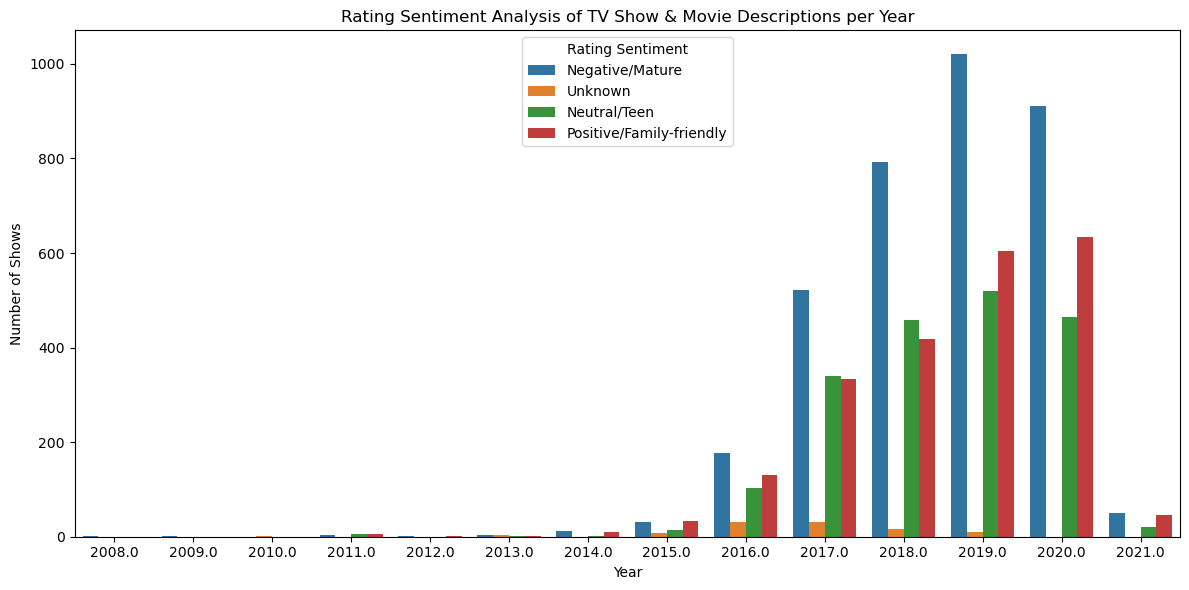

In [34]:
# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=rating_sentiment_per_year, x='Year', y='Count', hue="Rating_Sentiment")
plt.title('Rating Sentiment Analysis of TV Show & Movie Descriptions per Year')
plt.ylabel('Number of Shows')
plt.xlabel('Year')
plt.legend(title='Rating Sentiment')
plt.tight_layout()
plt.show()

## Sentiment Analysis on description column

In [35]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

# Extract year
df['Year'] = df['Date'].dt.year

# Define function for sentiment
def get_sentiment(text):
    if pd.isna(text):
        return 'Neutral'
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis on Description
df['Sentiment'] = df['Description'].apply(get_sentiment)

# Aggregate sentiment counts per year
sentiment_per_year = df.groupby(['Year', 'Sentiment']).size().reset_index(name='Count')
sentiment_per_year


,Year,Sentiment,Count
0,2008.0,Negative,1
1,2008.0,Neutral,1
2,2009.0,Neutral,1
3,2009.0,Positive,1
4,2010.0,Negative,1
5,2011.0,Negative,6
6,2011.0,Neutral,3
7,2011.0,Positive,4
8,2012.0,Neutral,2
9,2012.0,Positive,1


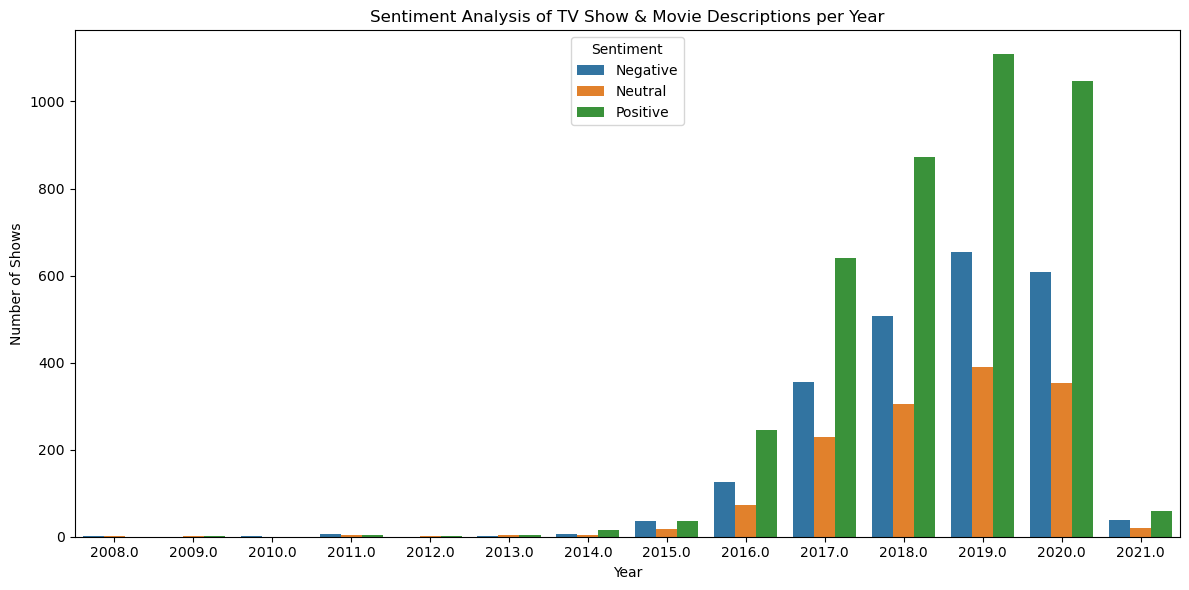

In [36]:
# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=sentiment_per_year, x='Year', y='Count', hue='Sentiment')
plt.title('Sentiment Analysis of TV Show & Movie Descriptions per Year')
plt.ylabel('Number of Shows')
plt.xlabel('Year')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()